# Simple Linear Regression

In [6]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'harga': [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


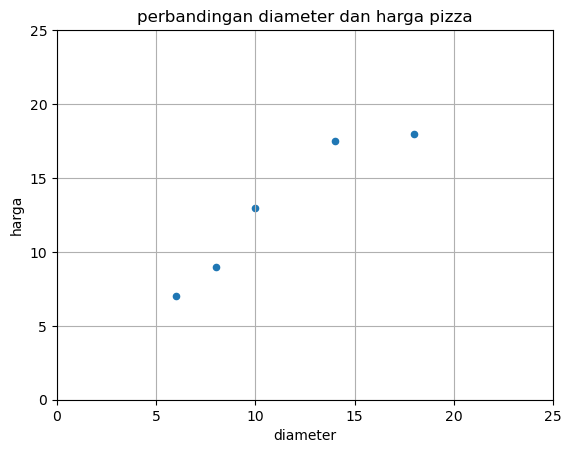

In [3]:
import matplotlib.pyplot as plt

pizza_df.plot (kind='scatter', x='diameter', y='harga')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter')
plt.ylabel('harga')

plt.xlim(0,25)
plt.ylim(0,25)

plt.grid(True)

plt.show()

In [7]:
import numpy as np

x = np.array(pizza_df['diameter'])
y= np.array(pizza_df['harga'])

print (f'x: {x}')
print (f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [8]:
x= x.reshape(-1,1)
x.shape

(5, 1)

In [9]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [10]:
# visualisasi simple linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

x_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(x_vis)

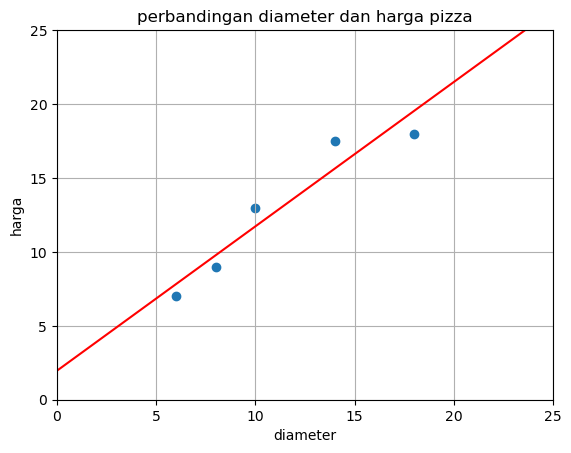

In [11]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter')
plt.ylabel('harga')

plt.xlim(0,25)
plt.ylim(0,25)

plt.grid(True)

plt.show()

In [11]:
print (f'intercept: {model.intercept_}')
print (f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [12]:
# mencari nilai slope

print(f'x= {x}')
print(f'x flatten= {x.flatten()}')
print(f'y= {y}')

x= [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
x flatten= [ 6  8 10 14 18]
y= [ 7.   9.  13.  17.5 18. ]


In [13]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance= {variance_x}')

variance= 23.2


In [14]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [15]:
covariance_xy = np.cov(x.transpose(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


In [16]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


In [17]:
intercept = np.mean(y)- slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


In [18]:
# prediksi harga pizza

diameter_pizza = np.array([12,20,23]).reshape(-1,1)

diameter_pizza

array([[12],
       [20],
       [23]])

In [19]:
prediksi_harga = model.predict(diameter_pizza)

prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [20]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga: {hrg}')

diameter: [12] prediksi harga: 13.681034482758621
diameter: [20] prediksi harga: 21.491379310344826
diameter: [23] prediksi harga: 24.42025862068965


In [21]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

x_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# evaluasi linerar regression model dengan coefficient of determination (R-squared)

from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)

print (f'r squared: {r_squared}')

r squared: 0.6620052929422553


In [25]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2 for x_i, y_i, in zip (x_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [26]:
mean_y = np.mean(y_test)

ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print (f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [27]:
r_squared = 1-(ss_res/ss_tot)

print (f'r squared: {r_squared}')

r squared: 0.6620052929422553
